<a href="https://colab.research.google.com/github/carlosmding/PDI_SecondProject/blob/main/Descriptores_HOG_SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#Caracter√≠sticas del descriptor HOG

Los descriptores HOG (del ingl√©s Histogram of Oriented Gradients) se basan en
la orientaci√≥n del gradiente en √°reas locales de una imagen. El descriptor HOG permite aprovechar de forma eficiente la informaci√≥n del gradiente a partir de combinar esta informaci√≥n en forma de histogramas orientados locales, que se calculan en celdas de peque√±o tama√±o, las cuales se distribuyen de forma uniforme por toda la imagen.

Dichos histogramas nos proporcionan informaci√≥n de las orientaciones de los contornos que dominan en cada una de las posiciones de la imagen. Esta informaci√≥n nos va a permitir distinguir la forma de los objetos presentes en una imagen y es una buena base para detectar y reconocer dichos objetos. Gracias a esa informaci√≥n, podemos ver la frontera entre un objeto y otro.

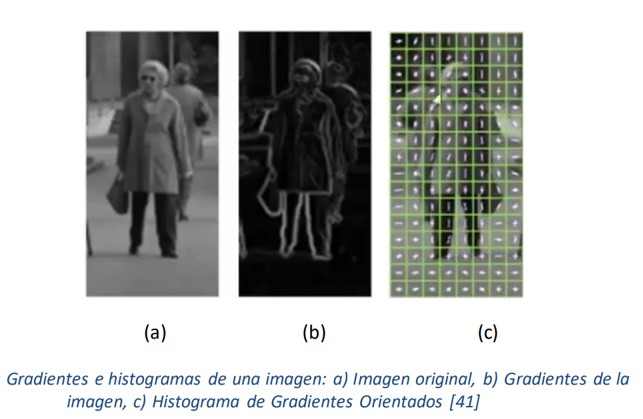

In [ ]:
grad = cv.imread("/content/gradienteHOG.jpg")
cv2_imshow(grad)

El gradiente se define como un cambio de la intensidad de la imagen en una
cierta direcci√≥n. Dicha direcci√≥n es aquella en la que el cambio de intensidad es m√°ximo. Se calcula para cada uno de los pixeles de una imagen y queda definido para cada pixel por dos valores:
- La direcci√≥n donde el cambio de intensidad es m√°ximo
- La magnitud del cambio en dicha direcci√≥n. 

El c√°lculo de estos gradientes se realiza a partir de la diferencia de intensidad de los pixeles vecinos en direcci√≥n tanto horizontal como vertical.

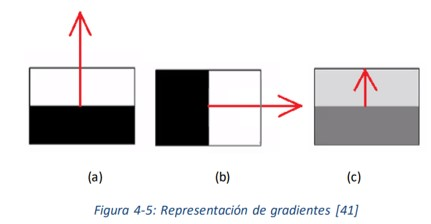

In [ ]:
grads = cv.imread("/content/gradientes.jpg")
cv2_imshow(grads)

Como se puede observar, en la primera imagen se tiene un gradiente en direcci√≥n vertical, pues es la direcci√≥n donde el cambio de intensidad es m√°ximo (pasamos de negro a blanco). En la tercera sin embargo, se produce en la misma direcci√≥n pero su magnitud es menor, puesto que no hay tanto cambio de intensidad como en la primera (pasamos de un gris a otro con diferente valor). En la segunda imagen por su parte, se tiene un gradiente de la misma magnitud que el primero, pero con direcci√≥n horizontal, puesto que es la direcci√≥n donde hay mayor cambio de intensidad en dicha imagen. 

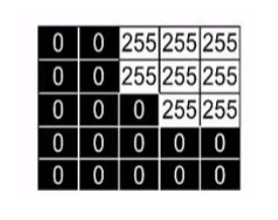

In [ ]:
ej = cv.imread("/content/ej.jpg")
cv2_imshow(ej)

###Ejemplo (C√°lculo)

En la imagen se realizar√° el c√°lculo del gradiente del pixel del centro. Se debe hallar la diferencia horizontal y la diferencia vertical.

dx = (x+1,y) - (x-1, y)
dy = (x, y+1) - (x, y-1)

dx= 255 - 0 = 255
dy= 0 - 255 = -255

Calculamos la orientaci√≥n y la magnitud
- Orientaci√≥n: arctan (dy/dx) = arctan(-1) = -45¬∞
- Magnitud: ‚àö(ùëëùë•2 + ùëëùë¶2) = 360.62

Para calcular el HOG
1. Se divide la imagen en un n√∫mero fijo de celdas (6\*6 o 8\*8 pixeles) para cada de estas se obtiene un histograma de las orientaciones de los gradientes; se debe tener en cuenta el rango de las orientaciones (con o sin signo) y adem√°s los intervalos del rango (9 sub-rangos de 20¬∞). Una vez calculados, cada uno de estos gradientes quedar√° asignado a uno de
los intervalos y asi se obtiene el histograma para esa celda.
2. Una vez obtenidos todos los histogramas de cada celda se combian para objeter la represtaci√≥n global de toda la imagen en forma de vector de caracteristicas.

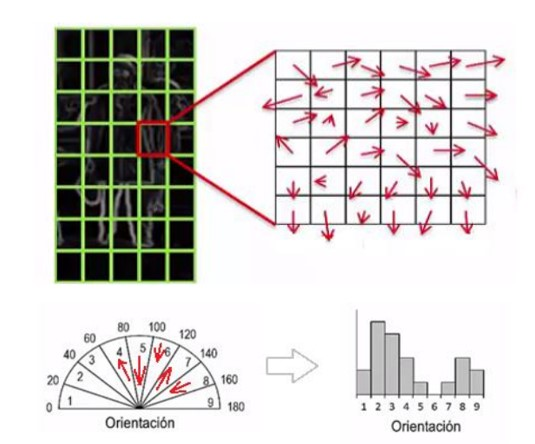

In [ ]:
gradi = cv.imread("/content/gradi.jpg")
cv2_imshow(gradi)

#C√°lculando un histograma de gradientes

Matrix pixeles ([:3],[:])
[[142 154 172 168 120 217]
 [148 143 159 170 143 167]
 [170 131 159 189 199 218]]
Gx
[[  0.  30.  14. -52.  49.   0.]
 [  0.  11.  27. -16.  -3.   0.]
 [  0. -11.  58.  40.  29.   0.]]
Gy
[[  0.   0.   0.   0.   0.   0.]
 [ 28. -23. -13.  21.  79.   1.]
 [ 63. -10. -14.  46.  76.  55.]]
√Ångulos
[[  0.         0.         0.       180.         0.         0.      ]
 [ 90.       295.56293  334.2872   127.29845   92.17431   90.      ]
 [ 90.       222.2825   346.42828   48.98524   69.109795  90.      ]]
 


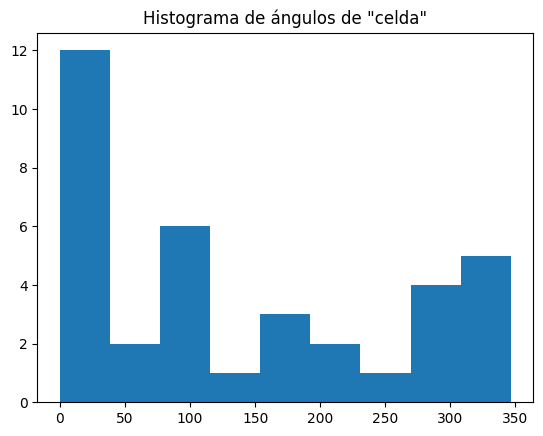

In [122]:
img = cv.imread("/content/fresa (5).jpg")
imgR = cv.resize(img, (64, 64), interpolation = cv.INTER_AREA)

celda =imgR[15:21,15:21]
gray = cv.cvtColor(celda, cv.COLOR_BGR2GRAY)

# Calculate gradient
gx = cv.Sobel(gray, cv.CV_32F, 1, 0, ksize=1)
gy = cv.Sobel(gray, cv.CV_32F, 0, 1, ksize=1)

# Python Calculate gradient magnitude and direction ( in degrees )
mag, angles = cv.cartToPolar(gx, gy, angleInDegrees=True)

print("Matrix pixeles ([:3],[:])")
print(gray[:3])
print("Gx")
print(gx[:3])
print("Gy")
print(gy[:3])
print("√Ångulos")
print(angles[:3])

magnitudes=mag.flatten().tolist()
ang=angles.flatten().tolist()

print(" ")
plt.hist(ang,bins = 9) 
plt.title("Histograma de √°ngulos de \"celda\"")
plt.show()


#Caracter√≠sticas del M√©todo SIFT

SIFT (Scale-invariant feature transform), o transformaci√≥n de caracter√≠stica en
escala invariable, es un algoritmo que comparando valores de pixeles encuentra coincidencias entre pares de puntos pertenecientes a diferentes fotograf√≠as, de
manera que estos pueden ser utilizados como gu√≠a para el empalmado de las
im√°genes y su transformaci√≥n en panoramas.  

Primero debemos tener en cuenta la escala de la imagen, por lo que se utilizan tres par√°metros (x, y, œÉ), ‚Äòx‚Äô e ‚Äòy‚Äô representan un punto en el espacio donde puede encontrarse un punto clave potencial y ‚ÄòœÉ‚Äô la escala a la que se encuentra. Estos valores se buscan mediante diferencia de gaussianas.
Una vez encontrados estos puntos clave deben ser refinados para obtener resultados mas precisos. Utilizando la expansi√≥n del espacio de escala de la serie de Taylor para obtener una ubicaci√≥n m√°s precisa de los extremos eliminando los puntos clave de bajo contraste y los puntos clave pertenecientes a bordes quedando √∫nicamente los puntos clave en los que estamos interesados.

Posteriormente se asigna una orientaci√≥n a cada punto clave para lograr la invarianza a la rotaci√≥n en la imagen. Se toma un vecindario alrededor del punto clave dependiendo de la escala, la magnitud y la direcci√≥n del gradiente.
Por √∫ltimo, se crea un el descriptor del punto clave. Se toma un vecindario de 16 x 16 alrededor del punto dividi√©ndose en varios sub-bloques dando al final como resultado 128 valores bin.

El proceso del SIFT requiere contrucci√≥n de pir√°mides de escala/espacio y detecci√≥n de extremos, localizaci√≥n de puntos claves, asignaci√≥n de la orientaci√≥n y descripci√≥n de puntos claves.

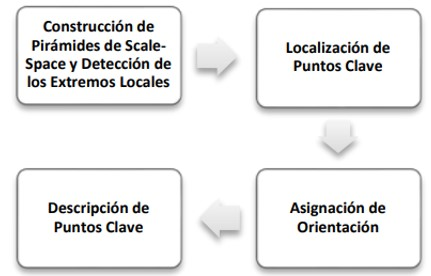

In [91]:
sift = cv.imread("/content/Sift.jpg")
cv2_imshow(sift)

Extracci√≥n de puntos claves

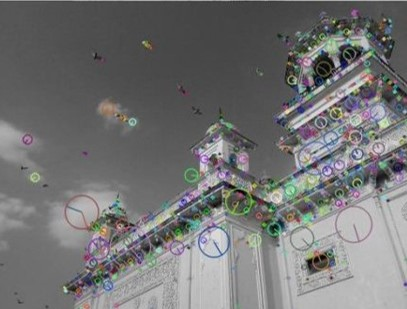

In [100]:
punto_clave = cv.imread("/content/puntosClaves.jpg")
cv2_imshow(punto_clave)

## Ejemplo - Puntos clave

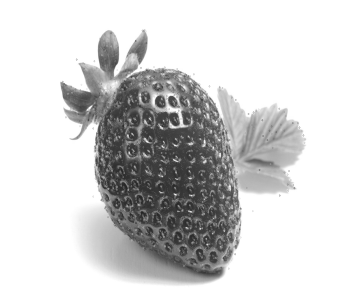

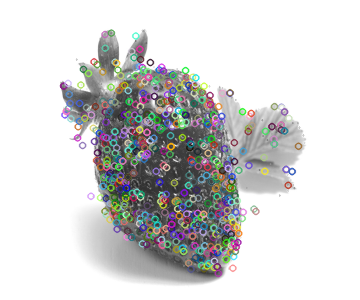

In [127]:
imgR = cv.resize(img, (360, 300), interpolation = cv.INTER_AREA)
gray= cv.cvtColor(imgR,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img_pto=cv.drawKeypoints(gray,kp,img)

cv2_imshow(gray)
cv2_imshow(img_pto)

## Ejemplo - Matches

Detecci√≥n de puntos claves y comparaci√≥n en una imagen y su rotaci√≥n de 90¬∫ usando openCV


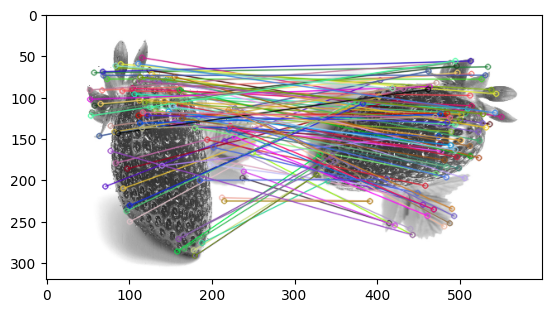

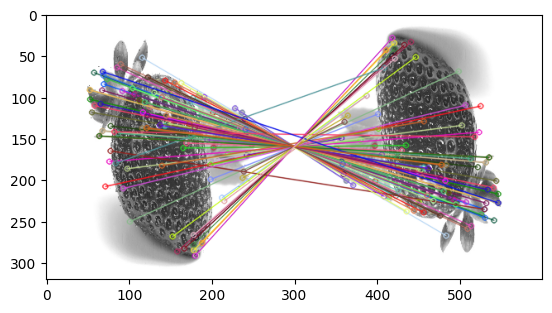

(<matplotlib.image.AxesImage at 0x7f4859ec0d00>, None)

In [130]:
img = cv.resize(img, (300,320))
img2 = cv.imread("/content/fresa (5)_rotada.jpg")
img2 = cv.resize(img2, (300,320))

img3 = cv.imread("/content/fresa (5)_reves.jpg")
img3 = cv.resize(img3, (300,320))

im_g = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
im_g2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
im_g3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)

# Initiate SIFT detector
sift = cv.SIFT_create()

# detect and compute the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(im_g,None)
kp2, des2 = sift.detectAndCompute(im_g2,None)
kp3, des3 = sift.detectAndCompute(im_g3,None)

# create BFMatcher object
bf = cv.BFMatcher()

# Match descriptors.
matches12 = bf.match(des1,des2)
matches13 = bf.match(des1,des3)

# sort the matches based on distance
matches12 = sorted(matches12, key=lambda val: val.distance)
matches13 = sorted(matches13, key=lambda val: val.distance)

# Draw first 100 matches.
out = cv.drawMatches(im_g, kp1, im_g2, kp2, matches12[:100], None, flags=2)
plt.imshow(out), plt.show()

out = cv.drawMatches(im_g, kp1, im_g3, kp3, matches13[:100], None, flags=2)
plt.imshow(out), plt.show()
